# Machine Learning Regression Model

In [ ]:
???

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
...,...,...,...,...,...,...,...
2023-03-14,256.750000,261.070007,255.860001,260.790009,33620300,1.751806,UP
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,3.895731,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
model_dt = DecisionTreeRegressor(max_depth=15)

In [11]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeRegressor(max_depth=15)

### Visualize the model

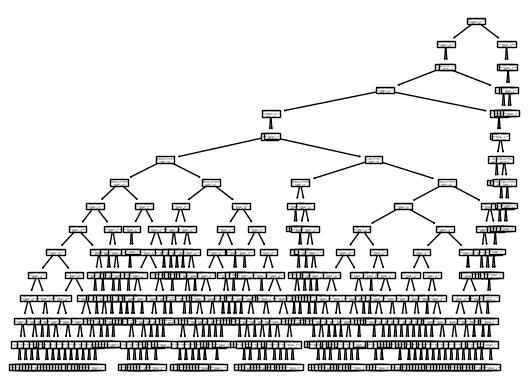

In [12]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [15]:
y_pred = model_dt.predict(X=explanatory)

In [16]:
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549143,0.081958
2016-12-09,0.321692,0.330148
...,...,...
2023-03-14,1.751806,0.315103
2023-03-15,3.895731,3.895731


### Evaluate the model: compare predictions with the reality

In [17]:
model_dt.score(X=explanatory, y=target)

0.5431115880820776

In [ ]:
error.hist(bins=30);

The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](src/std_normal.png)

source: wikipedia

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [110]:
import pickle

In [111]:
with open(???, 'wb') as f:
    pickle.dump(model_dt, f)